In [2]:
#导入波士顿房价数据集
#############################  svm实例--波士顿房价回归分析 #######################################
#导入numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt
#导入波士顿房价数据集
from sklearn.datasets import load_boston
boston = load_boston()
#打印数据集中的键
print(boston.keys())
 
#打印数据集中的短描述
#print(boston['DESCR'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
#使用SVR进行建模
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#建立训练数据集和测试数据集
X,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
print('\n\n\n')
print('代码运行结果')
print('====================================\n')
#打印训练集和测试集的形态
print(X_train.shape)
print(X_test.shape)
print('\n====================================')
print('\n\n\n')





代码运行结果

(379, 13)
(127, 13)







In [3]:
#导入支持向量机回归模型
from sklearn.svm import SVR
#分别测试linear核函数和rbf核函数
for kernel in ['linear','rbf']:
    svr = SVR(kernel = kernel,gamma = 'auto')
    svr.fit(X_train,y_train)
    print(kernel,'核函数的模型训练集得分: {:.3f}'.format(svr.score(X_train,y_train)))
    print(kernel,'核函数的模型测试集得分: {:.3f}'.format(svr.score(X_test,y_test)))

linear 核函数的模型训练集得分: 0.709
linear 核函数的模型测试集得分: 0.696
rbf 核函数的模型训练集得分: 0.145
rbf 核函数的模型测试集得分: 0.001


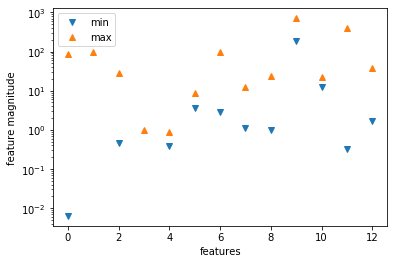

In [4]:
#将特征数值中的最小值和最大值用散点画出来
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
#设定纵坐标为对数形式
plt.yscale('log')
#设置图注位置为最佳
plt.legend(loc='best')
#设定横纵轴标题
plt.xlabel('features')
plt.ylabel('feature magnitude')
#显示图形
plt.show()

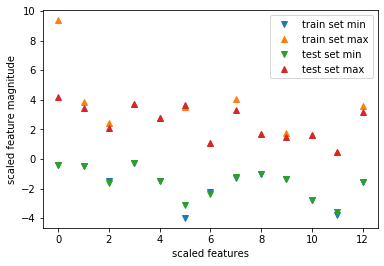

In [5]:
#用StandardScaler进行数据预处理
#导入数据预处理工具
from sklearn.preprocessing import StandardScaler
#对训练集和测试集进行数据预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#将预处理后的数据特征最大值和最小值用散点图表示出来
 
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
 
#设置图注位置为最佳
plt.legend(loc='best')
#设定横纵轴标题
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
#显示图形
plt.show()

In [6]:
#数据预处理后重新训练模型
#用预处理后的数据重新训练模型
for kernel in ['linear','rbf']:
    svr = SVR(kernel = kernel)
    svr.fit(X_train_scaled,y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分: {:.3f}'.format(svr.score(X_train_scaled,y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分: {:.3f}'.format(svr.score(X_test_scaled,y_test)))

数据预处理后 linear 核函数的模型训练集得分: 0.706
数据预处理后 linear 核函数的模型测试集得分: 0.698
数据预处理后 rbf 核函数的模型训练集得分: 0.665
数据预处理后 rbf 核函数的模型测试集得分: 0.695


In [7]:
#设置"rbf"内核的SVR模型的C参数和gamma参数
svr = SVR(C=100,gamma=0.1)
svr.fit(X_train_scaled,y_train)
print('调节参数后的"rbf"内核的SVR模型在训练集得分:{:.3f}'.format(svr.score(X_train_scaled,y_train)))
print('调节参数后的"rbf"内核的SVR模型在测试集得分:{:.3f}'.format(svr.score(X_test_scaled,y_test)))

调节参数后的"rbf"内核的SVR模型在训练集得分:0.966
调节参数后的"rbf"内核的SVR模型在测试集得分:0.894
